# Data generation

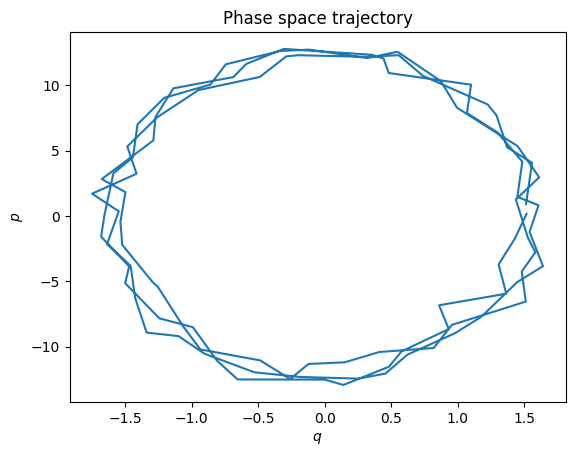

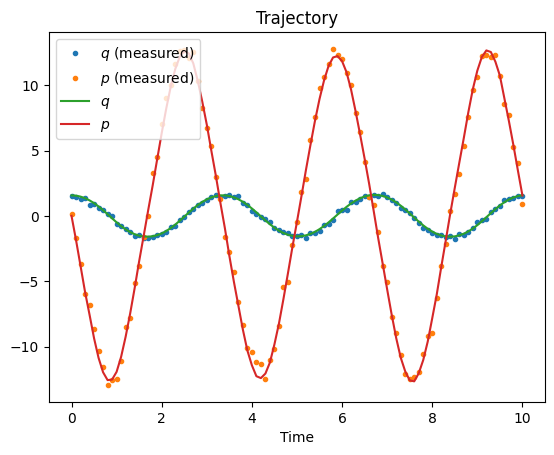

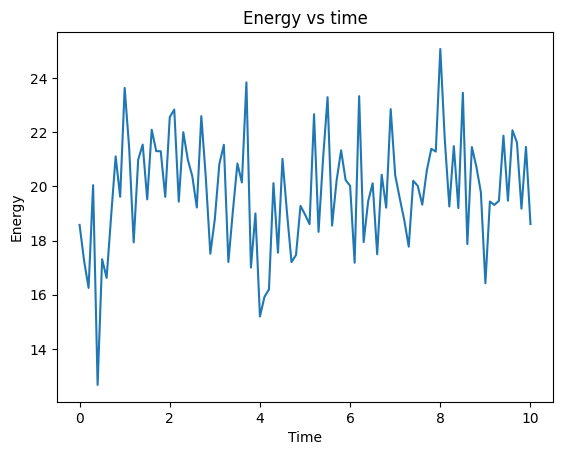

In [2]:
import jax
import jax.numpy as jnp
import jax.random as random

from stoch_ham.simple_pendulum.random_acc_fluctuations import get_dataset, hamiltonian

import matplotlib.pyplot as plt

seed = 12
key = random.PRNGKey(seed)

true_params = {
    'mass': 1.,
    'length': 2.,
    'lambda': 5.,
    'q': 0.05
}

x_0 = jnp.array([jnp.pi / 2, 0.])
t_span = (0., 10.)

true_traj, observations = get_dataset(key, 1, true_params, x_0, t_span)[0]

ts = jnp.linspace(*t_span, len(traj))

plt.figure()
plt.plot(observations[:, 0], observations[:, 1])
plt.xlabel(r"$q$")
plt.ylabel(r"$p$")
plt.title("Phase space trajectory")
plt.show()

plt.figure()
plt.plot(ts, observations[:, 0], '.', label=r"$q$ (measured)")
plt.plot(ts, observations[:, 1], '.', label=r"$p$ (measured)")
plt.plot(ts, true_traj[:, 0], label=r"$q$")
plt.plot(ts, true_traj[:, 1], label=r"$p$")
plt.title("Trajectory")
plt.xlabel("Time")
plt.legend()
plt.show()

energies = jax.vmap(hamiltonian, in_axes=(0, None))(observations, true_params)
plt.figure()
plt.plot(ts, energies)
plt.title("Energy vs time")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.show()

# Filtering

In [ ]:
from stoch_ham.filtering import filtering
from stoch_ham.linearization import extended
from stoch_ham.base import MVNStandard, FunctionalModel

params = {
    'mass': 1.,
    'length': 2.,
    'lambda': 5.,
    'q': 0.05
}

n_dim = 2
x0 = MVNStandard(jnp.array([jnp.pi / 2, 0.]), jnp.identity(n_dim))

